# Human data analysis
Pearson's and Spearman's correlation coeffeicients

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [27]:
df_human = pd.read_csv('data/data_survey.csv', sep=';')
df_human['Occupation'] = df_human['Occupation'].str.split('/').str[0].str.strip()

df_gpt = pd.read_csv('data/data_gpt_processed.csv', sep=';')
df_llama = pd.read_csv('data/data_llama_processed.csv', sep=';')

In [28]:
df_human = df_human[df_human['Occupation'].isin(df_gpt['Occupation']) | df_human['Occupation'].isin(df_llama['Occupation'])]

In [29]:
df_gpt = df_gpt[df_gpt['Occupation'].isin(df_human['Occupation'])]
df_llama = df_gpt[df_llama['Occupation'].isin(df_human['Occupation'])]

C:\Users\shiyi\AppData\Local\Temp\ipykernel_6812\190892664.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_llama = df_gpt[df_llama['Occupation'].isin(df_human['Occupation'])]


In [30]:
def calculate_gender_distribution(df, occupation_col='Occupation', gender_col='Gender_ENG'):
    """
    Calculate the percentage gender distribution for each unique occupation.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    occupation_col (str): The name of the column containing the occupations.
    gender_col (str): The name of the column containing the gender information.
    
    Returns:
    pd.DataFrame: A DataFrame with the occupation and percentage distribution for each gender.
    """

    gender_counts = df.groupby([occupation_col, gender_col]).size().unstack(fill_value=0)
    total_counts = gender_counts.sum(axis=1)
    gender_percentage = gender_counts.div(total_counts, axis=0) * 100
    gender_percentage['Total'] = total_counts

    return gender_percentage.reset_index()

def exclude_neutral(df, occupation_col='Occupation', gender_col='Gender_ENG', exclude_gender='Neutral'):
    """
    Calculate the percentage gender distribution for each unique occupation, excluding a specific gender.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    occupation_col (str): The name of the column containing the occupations.
    gender_col (str): The name of the column containing the gender information.
    exclude_gender (str): The gender to exclude from the calculations.
    
    Returns:
    pd.DataFrame: A DataFrame with the occupation and percentage distribution for each gender excluding the specified gender.
    """
    
    df_filtered = df[df[gender_col] != exclude_gender]
    gender_counts = df_filtered.groupby([occupation_col, gender_col]).size().unstack(fill_value=0)
    total_counts = gender_counts.sum(axis=1)
    gender_percentage = gender_counts.div(total_counts, axis=0) * 100
    gender_percentage['Total'] = total_counts

    return gender_percentage.reset_index()

In [31]:
distr_gpt = calculate_gender_distribution(df_gpt)
distr_llama = calculate_gender_distribution(df_llama)

In [32]:
distr_gpt_excl = exclude_neutral(df_gpt)
distr_llama_excl = exclude_neutral(df_llama)

In [33]:
def human_gender_distribution(df, occupation_col='Occupation'):
    """
    Calculate the percentage gender distribution for each unique occupation based on participant votes.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    occupation_col (str): The name of the column containing the occupations.
    
    Returns:
    pd.DataFrame: A DataFrame with the occupation and percentage distribution for each gender.
    """
    
    df.columns = df.columns.astype(str)
    
    # Melt the DataFrame to reshape it for analysis
    df_melted = df.melt(id_vars=[occupation_col], value_vars=df.columns.difference([occupation_col]),
                        var_name='Participant', value_name='Gender_ENG')

    gender_counts = df_melted.groupby([occupation_col, 'Gender_ENG']).size().unstack(fill_value=0)
    total_counts = gender_counts.sum(axis=1)
    gender_percentage = gender_counts.div(total_counts, axis=0) * 100
    gender_percentage['Total'] = total_counts

    return gender_percentage.reset_index()

def human_exclude_neutral(df, occupation_col='Occupation', exclude_gender='Neutral'):
    """
    Calculate the percentage gender distribution for each unique occupation based on participant votes, excluding a specific gender.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    occupation_col (str): The name of the column containing the occupations.
    exclude_gender (str): The gender to exclude from the calculations.
    
    Returns:
    pd.DataFrame: A DataFrame with the occupation and percentage distribution for each gender, excluding the specified gender.
    """

    df.columns = df.columns.astype(str)
    df_melted = df.melt(id_vars=[occupation_col], value_vars=df.columns.difference([occupation_col]),
                        var_name='Participant', value_name='Gender_ENG')
    df_filtered = df_melted[df_melted['Gender_ENG'] != exclude_gender]
    gender_counts = df_filtered.groupby([occupation_col, 'Gender_ENG']).size().unstack(fill_value=0)
    total_counts = gender_counts.sum(axis=1)
    gender_percentage = gender_counts.div(total_counts, axis=0) * 100
    gender_percentage['Total'] = total_counts

    return gender_percentage.reset_index()


In [34]:
distr_human = human_gender_distribution(df_human)
distr_human_excl = human_exclude_neutral(df_human)

In [35]:
distr_gpt

Gender_ENG,Occupation,Female,Male,Neutral,Total
0,accountant,14.285714,85.714286,0.000000,7
1,advocaat,66.030534,33.969466,0.000000,262
2,archeoloog,48.648649,48.648649,2.702703,222
3,architect,39.198606,60.452962,0.348432,574
4,archivaris,40.000000,60.000000,0.000000,5
5,arts,66.666667,33.333333,0.000000,9
6,beeldhouwer,83.333333,16.666667,0.000000,6
7,bibliothecaris,40.331492,58.563536,1.104972,181
8,bloemist,79.687500,18.750000,1.562500,64
9,boekhouder,7.692308,92.307692,0.000000,13


In [36]:
distr_human_excl

Gender_ENG,Occupation,Female,Male,Total
0,accountant,25.000000,75.000000,4
1,adviseur,33.333333,66.666667,3
2,advocaat,50.000000,50.000000,2
3,archeoloog,75.000000,25.000000,4
4,architect,33.333333,66.666667,3
5,archivaris,50.000000,50.000000,2
6,arts,100.000000,0.000000,2
7,astroloog,60.000000,40.000000,5
8,auteur,0.000000,100.000000,2
9,beeldhouwer,0.000000,100.000000,4


## Pearson's and Spearman's correlation coefficients

In [37]:
#     return correlations
def calculate_correlations(distr_llm, distr_human):
    """
    Calculate the Pearson and Spearman correlations between the percentage distributions for distr_gpt and distr_human.
    
    Parameters:
    distr_gpt (pd.DataFrame): DataFrame containing GPT-3.5 percentage distributions.
    distr_human (pd.DataFrame): DataFrame containing human-annotated percentage distributions.
    
    Returns:
    dict: A dictionary with Pearson and Spearman correlation values for Female, Male, and Neutral.
    """

    merged_df = pd.merge(distr_llm, distr_human, on='Occupation', suffixes=('_llm', '_human'))

    # Calculate Pearson and Spearman correlations for each gender
    correlations = {}
    for gender in ['Female', 'Male', 'Neutral']:
        pearson_corr = merged_df[f'{gender}_llm'].corr(merged_df[f'{gender}_human'], method='pearson')
        spearman_corr = merged_df[f'{gender}_llm'].corr(merged_df[f'{gender}_human'], method='spearman')
        correlations[gender] = {
            'Pearson': round(pearson_corr, 3),
            'Spearman': round(spearman_corr, 3)
        }

    return correlations, merged_df

def plot_pearson(merged_df, correlations, model_name='LLM'):
    """
    Plot the Pearson correlations between the LLM and human percentage distributions for each gender.
    
    Parameters:
    merged_df (pd.DataFrame): The merged DataFrame used for correlation calculations.
    correlations (dict): A dictionary with Pearson correlation values for Female and Male.
    model_name (str): The name of the model.
    """
    print("Columns in merged DataFrame for plotting:", merged_df.columns)
    
    for gender in ['Female', 'Male']:
        pearson_corr = correlations[gender]['Pearson']
        
        llm_col = f'{gender}_llm'
        human_col = f'{gender}_human'
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=merged_df[llm_col], y=merged_df[human_col])
        plt.title(f'{gender} Pearson Correlation: {pearson_corr:.3f}')
        plt.xlabel(f'{gender} {model_name} Percentage')
        plt.ylabel(f'{gender} Human Percentage')
        plt.grid(True)
        
        # Calculate and plot the average line
        z = np.polyfit(merged_df[llm_col], merged_df[human_col], 1)
        p = np.poly1d(z)
        plt.plot(merged_df[llm_col], p(merged_df[llm_col]), color='blue', linestyle='-', alpha=0.6, label='Regression Line')
        plt.legend()
        
        plt.show()

def plot_spearman(merged_df, correlations, model_name='LLM'):
    """
    Plot the Spearman correlations between the LLM and human percentage distributions for each gender.
    
    Parameters:
    merged_df (pd.DataFrame): The merged DataFrame used for correlation calculations.
    correlations (dict): A dictionary with Spearman correlation values for Female and Male.
    model_name (str): The name of the model.
    """
    # Print merged_df columns for debugging
    print("Columns in merged DataFrame for plotting:", merged_df.columns)
    
    for gender in ['Female', 'Male']:
        spearman_corr = correlations[gender]['Spearman']
        
        llm_col = f'{gender}_llm'
        human_col = f'{gender}_human'
        
        # Rank the data for Spearman correlation
        merged_df[f'{llm_col}_rank'] = merged_df[llm_col].rank()
        merged_df[f'{human_col}_rank'] = merged_df[human_col].rank()
        
        # Plot the Spearman correlation using ranks
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=merged_df[f'{llm_col}_rank'], y=merged_df[f'{human_col}_rank'])
        plt.title(f'{gender} Spearman Correlation: {spearman_corr:.3f}')
        plt.xlabel(f'{gender} {model_name} Rank')
        plt.ylabel(f'{gender} Human Rank')
        plt.xlim(0, 35)
        plt.ylim(0, 35)
        plt.grid(True)
        
        # Calculate and plot the monotonic regression line
        x = merged_df[f'{llm_col}_rank']
        y = merged_df[f'{human_col}_rank']
        monotonic_func = np.poly1d(np.polyfit(x, y, 1))
        plt.plot(x, monotonic_func(x), color='blue', alpha=0.6, label='Monotonic Line')
        plt.legend()
        
        plt.show()

### Including neutrals

GPT-3.5: 

Correlations for Female:
  Pearson: 0.29
  Spearman: 0.395
Correlations for Male:
  Pearson: 0.415
  Spearman: 0.397
Correlations for Neutral:
  Pearson: 0.008
  Spearman: -0.017
Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Neutral_llm', 'Total_llm',
       'Female_human', 'Male_human', 'Neutral_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


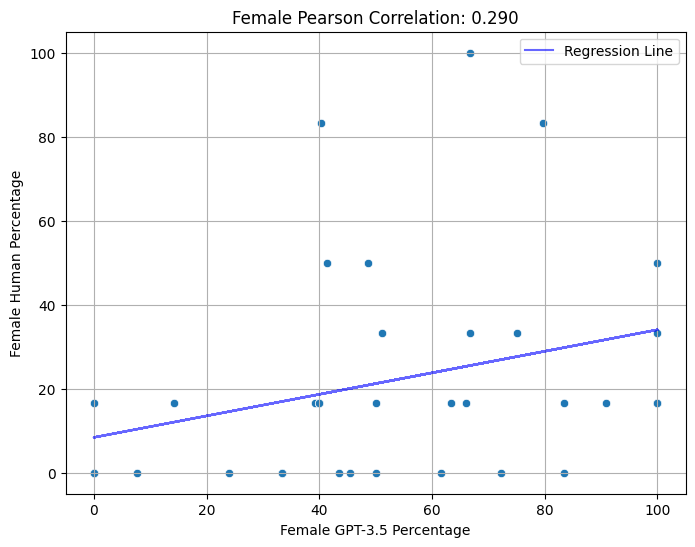

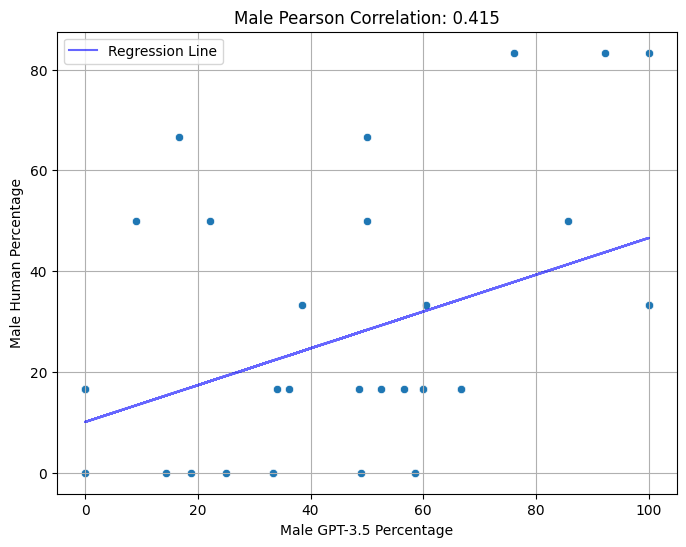

Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Neutral_llm', 'Total_llm',
       'Female_human', 'Male_human', 'Neutral_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


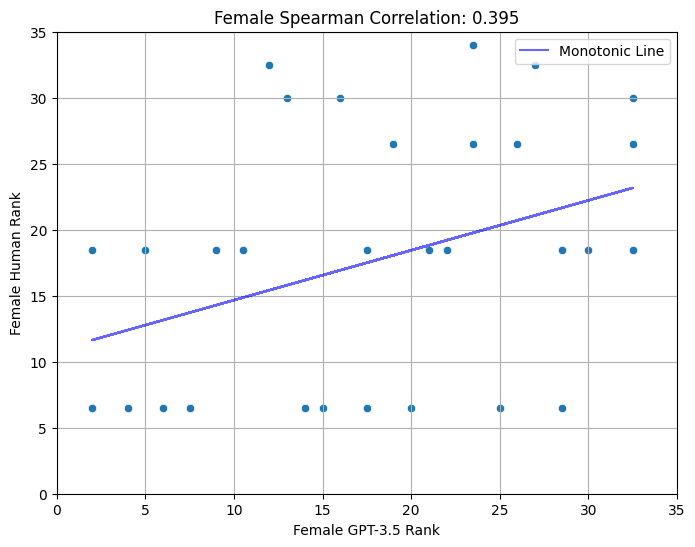

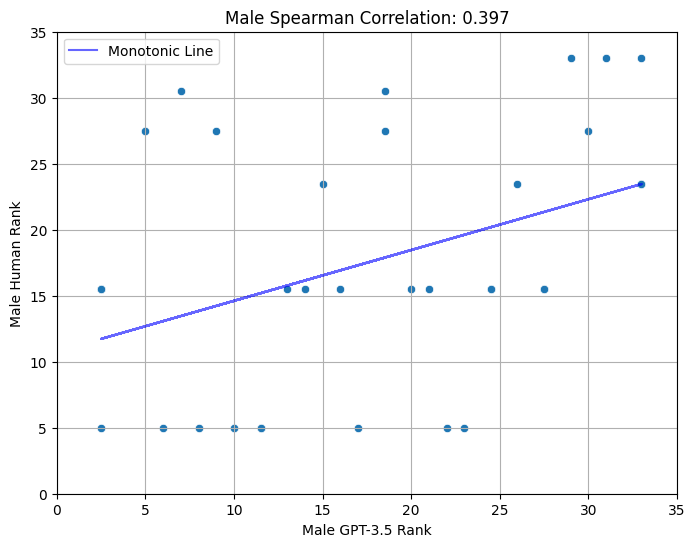

In [50]:
# GPT-3.5
correlations, merged_df = calculate_correlations(distr_gpt, distr_human)

# Print the results
print('GPT-3.5: \n')
for gender in correlations:
    print(f"Correlations for {gender}:")
    print(f"  Pearson: {correlations[gender]['Pearson']}")
    print(f"  Spearman: {correlations[gender]['Spearman']}")

plot_pearson(merged_df, correlations, model_name="GPT-3.5")
plot_spearman(merged_df, correlations, model_name="GPT-3.5")

Llama 2: 

Correlations for Female:
  Pearson: 0.196
  Spearman: 0.285
Correlations for Male:
  Pearson: 0.353
  Spearman: 0.301
Correlations for Neutral:
  Pearson: 0.12
  Spearman: 0.092
Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Neutral_llm', 'Total_llm',
       'Female_human', 'Male_human', 'Neutral_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


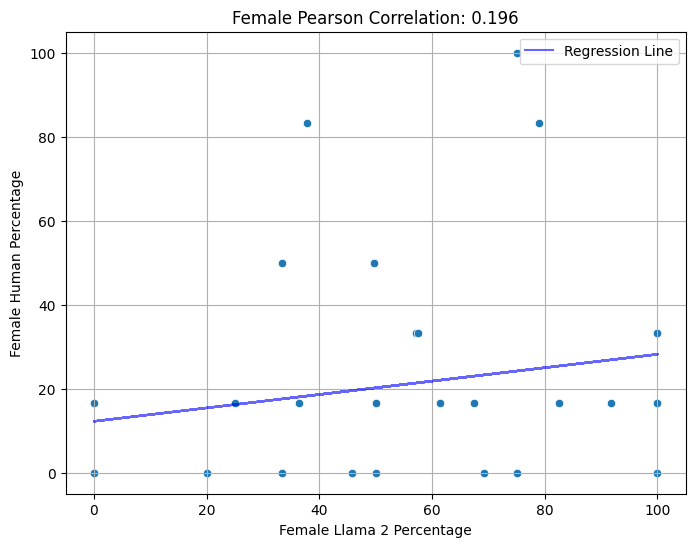

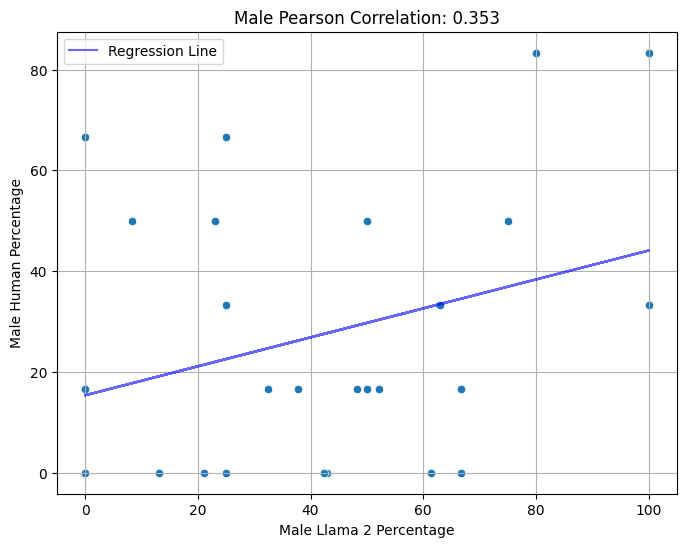

Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Neutral_llm', 'Total_llm',
       'Female_human', 'Male_human', 'Neutral_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


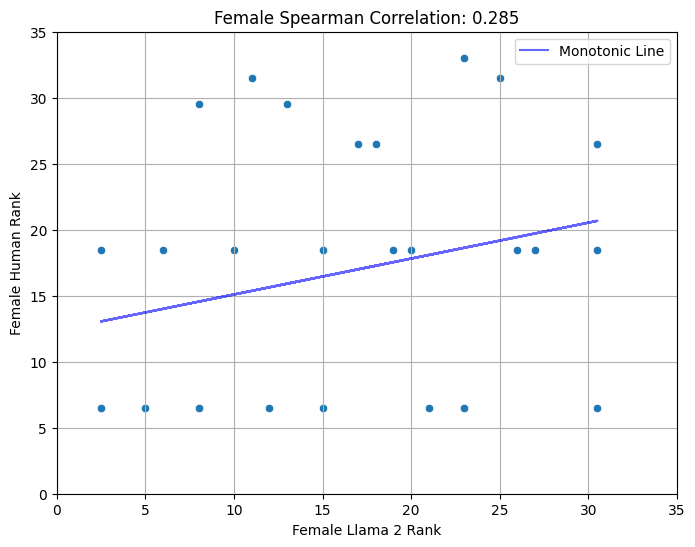

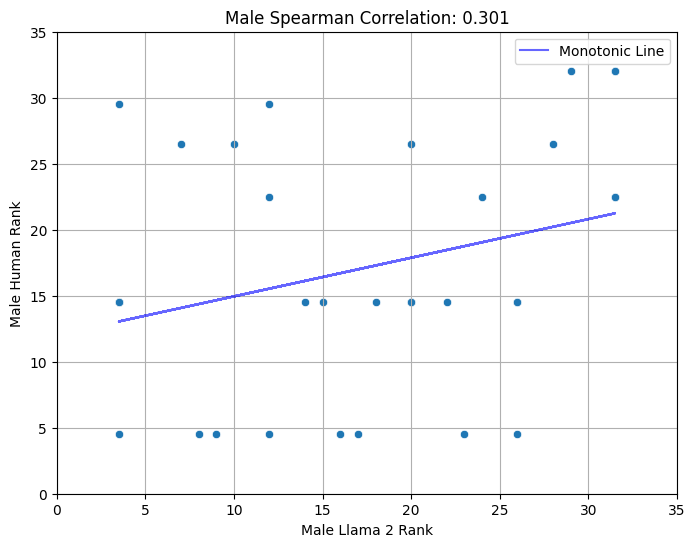

In [41]:
# Llama 2
correlations, merged_df = calculate_correlations(distr_llama, distr_human)

# Print the results
print('Llama 2: \n')
for gender in correlations:
    print(f"Correlations for {gender}:")
    print(f"  Pearson: {correlations[gender]['Pearson']}")
    print(f"  Spearman: {correlations[gender]['Spearman']}")

plot_pearson(merged_df, correlations, model_name="Llama 2")
plot_spearman(merged_df, correlations, model_name="Llama 2")


### Excluding neutrals

In [43]:
def calculate_correlations_excl(distr_llm, distr_human):
    """
    Exclude the Neutral
    """
    # Ensure both DataFrames have the same occupations
    merged_df = pd.merge(distr_llm, distr_human, on='Occupation', suffixes=('_llm', '_human'))

    # Calculate Pearson and Spearman correlations for each gender
    correlations = {}
    for gender in ['Female', 'Male']:
        pearson_corr = merged_df[f'{gender}_llm'].corr(merged_df[f'{gender}_human'], method='pearson')
        spearman_corr = merged_df[f'{gender}_llm'].corr(merged_df[f'{gender}_human'], method='spearman')
        correlations[gender] = {
            'Pearson': pearson_corr,
            'Spearman': spearman_corr
        }

    return correlations, merged_df

GPT-3.5 excluding Neutral: 

Correlations for Female:
  Pearson: 0.43523658855991576
  Spearman: 0.4597848435247773
Correlations for Male:
  Pearson: 0.43523658855991604
  Spearman: 0.4597848435247773
Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Total_llm', 'Female_human',
       'Male_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


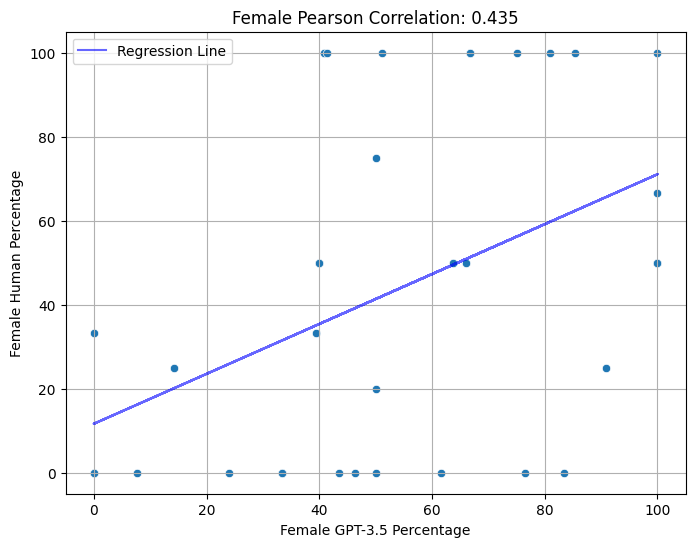

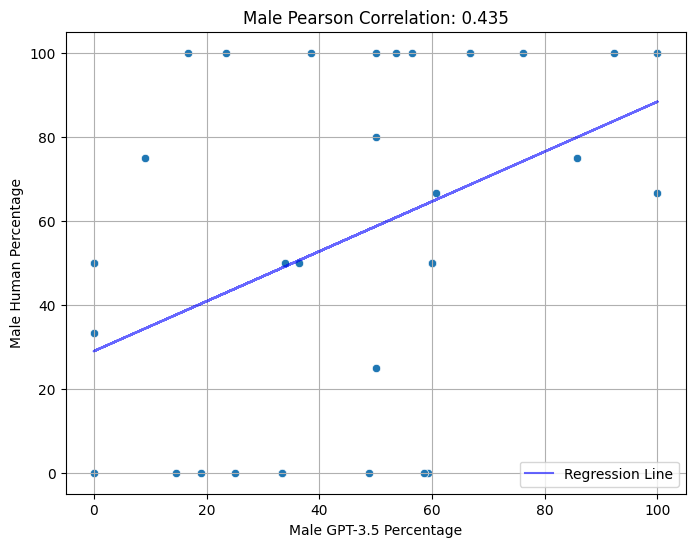

Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Total_llm', 'Female_human',
       'Male_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


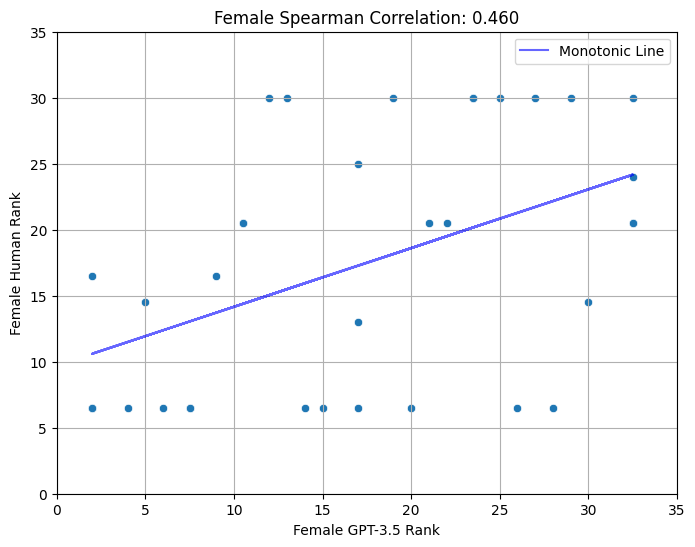

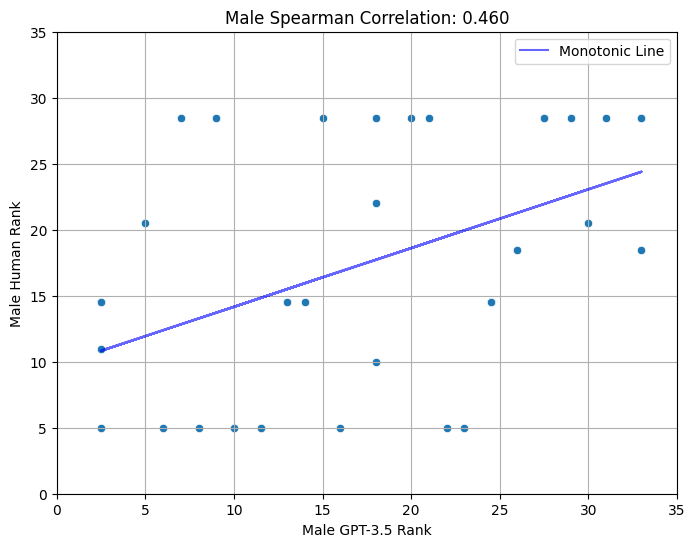

In [53]:
# Excluding Neutral
# GPT-3.5
correlations, merged_df = calculate_correlations_excl(distr_gpt_excl, distr_human_excl)

# Print the results
print('GPT-3.5 excluding Neutral: \n')
for gender in correlations:
    print(f"Correlations for {gender}:")
    print(f"  Pearson: {correlations[gender]['Pearson']}")
    print(f"  Spearman: {correlations[gender]['Spearman']}")

plot_pearson(merged_df, correlations, model_name="GPT-3.5")
plot_spearman(merged_df, correlations, model_name="GPT-3.5")


Llama 2 excluding Neutral: 

Correlations for Female:
  Pearson: 0.30720685428572664
  Spearman: 0.3315103769266929
Correlations for Male:
  Pearson: 0.3072068542857266
  Spearman: 0.3315103769266929
Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Total_llm', 'Female_human',
       'Male_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


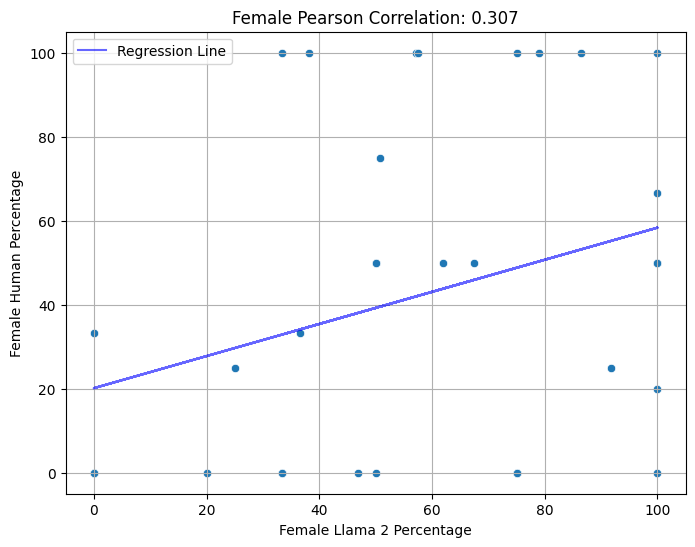

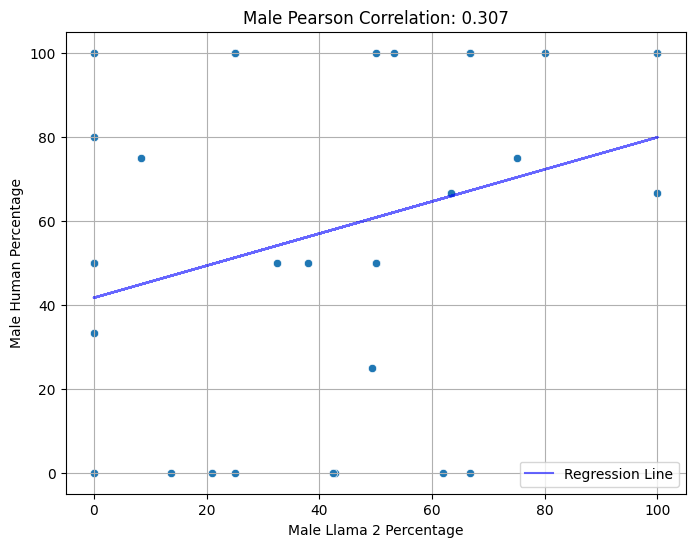

Columns in merged DataFrame for plotting: Index(['Occupation', 'Female_llm', 'Male_llm', 'Total_llm', 'Female_human',
       'Male_human', 'Total_human'],
      dtype='object', name='Gender_ENG')


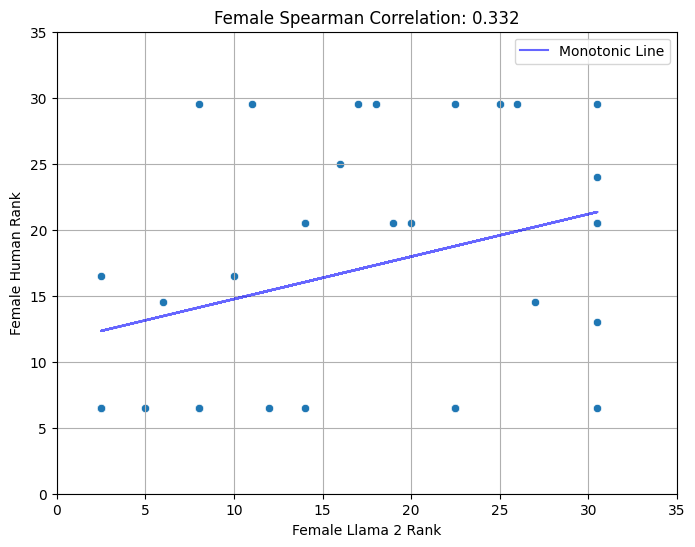

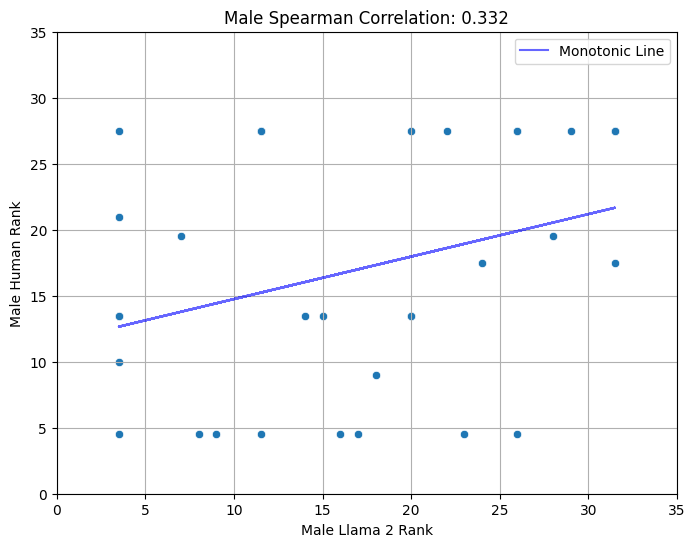

In [52]:
# Excluding Neutral
# Llama 2
correlations, merged_df = calculate_correlations_excl(distr_llama_excl, distr_human_excl)

# Print the results
print('Llama 2 excluding Neutral: \n')
for gender in correlations:
    print(f"Correlations for {gender}:")
    print(f"  Pearson: {correlations[gender]['Pearson']}")
    print(f"  Spearman: {correlations[gender]['Spearman']}")

plot_pearson(merged_df, correlations, model_name="Llama 2")
plot_spearman(merged_df, correlations, model_name="Llama 2")